## Exploratory Pt 2
This notebook is for an exploratory analysis of 3 additional data sources from invisible institute. Once I see how it's organized, how clean it is, I decide whether to add it. I expect to throw this data into model
- complaints-victims: to get breakdown of victims by race
- officer-filed-complaints__2017-09.csv.gz: to get count of cpd filed complaints (not exactly sure what this is)
- TRR-actions-responses_2004-2016_2016-09.csv.gz per data dictionary:
  - action: action taken by officer/member/subject
  - action_category: action level 0 (member presence) to 6 (firearm), only applicable for officer/member actions
  - action_sub_category: 'same as action_category, except some levels are broken into
    sublevels, i.e. physical holding (3.3) and taser displayed (3.1) are the same
    level, but different severity within the level '
  - force_type: description of member force (corresponds to action_sub_category, other
    and other force -> 2)
  - member_action: more specific description of force type
  - other_description: description of member action for other and other force member
    actions'
  - person: type of person commiting the action (member/officer or subject)
  - resistance_level: level of subject resistance, generated from member action
  - resistance_type: type of subject resistance (in original file)
  - trr_id: officer x event x subject specific id number, internally generated by CPD"

In [24]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import sys
import os
sys.path.insert(0, os.path.abspath("../pipeline"))
import Make_By_Officer_DF as make_officer_df
import Feat_Engineering as feat_engineering_helpers
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
complaints_victims = pd.read_csv("../data/complaints-victims.csv.gz", compression = "gzip")
complaints_accused = pd.read_csv("../data/complaints-accused.csv.gz", compression="gzip")
complaints = pd.read_csv("../data/complaints-complaints.csv.gz", compression="gzip")
CPD_filed_complaints = pd.read_csv("../data/officer-filed-complaints__2017-09.csv.gz")
TRR_action_responses = pd.read_csv("../data/TRR-actions-responses_2004-2016_2016-09.csv.gz", compression = "gzip")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploratory on victim demographics

In [10]:
complaints_victims.head(5)

,age,birth_year,cr_id,cv,gender,race
0,24.0,NaN,1000551,2,MALE,BLACK
1,51.0,NaN,1000861,2,FEMALE,BLACK
2,NaN,NaN,1001509,2,MALE,WHITE
3,NaN,NaN,1001880,2,FEMALE,BLACK
4,NaN,NaN,1003246,2,MALE,HISPANIC


Match these to our relevant complaints

In [14]:
t1 = (2012, 2014)
t2 = (2015, 2015)
complaints_t1, complaints_t2 = feat_engineering_helpers.relevant_complaints(complaints, complaints_accused, t1, t2)
complaints_t1 = complaints_t1.merge(complaints_victims, how = "left", on = "cr_id")
complaints_t1.head(5)

,cr_id,incident_date,UID,complaint_category,complaint_code,cv_x,final_finding,final_outcome,recc_finding,recc_outcome,link_UID,age,birth_year,cv_y,gender,race
0,1051762,2012-02-07,102767.0,"IMPACT WEAPON - UNAUTHORIZED (FLASHLIGHT, HAND...",S011,3.0,SU,150 Day Suspension,NaN,NaN,26925.0,NaN,1997.0,3.0,MALE,BLACK
1,1051762,2012-02-07,102767.0,"IMPACT WEAPON - UNAUTHORIZED (FLASHLIGHT, HAND...",S011,3.0,SU,150 Day Suspension,NaN,NaN,26925.0,NaN,1997.0,3.0,MALE,BLACK
2,1051762,2012-02-07,132251.0,"IMPACT WEAPON - UNAUTHORIZED (FLASHLIGHT, HAND...",S011,3.0,SU,150 Day Suspension,NaN,NaN,32252.0,NaN,1997.0,3.0,MALE,BLACK
3,1051762,2012-02-07,132251.0,"IMPACT WEAPON - UNAUTHORIZED (FLASHLIGHT, HAND...",S011,3.0,SU,150 Day Suspension,NaN,NaN,32252.0,NaN,1997.0,3.0,MALE,BLACK
4,1051815,2012-01-02,113650.0,NaN,NaN,2.0,NaN,Unknown,NaN,Unknown,7261.0,NaN,NaN,NaN,NaN,NaN


In [16]:
complaints_t1.groupby("race").size()

race
ASIAN/PACIFIC ISLANDER              306
BLACK                             24256
HISPANIC                           4115
NATIVE AMERICAN/ALASKAN NATIVE       39
WHITE                              3911
dtype: int64

In [ ]:
feat_engineering_helpers.complaint_bins(complaints_t1)
complaint_bins_by_race = pd.DataFrame(complaints_t1.groupby(["race","complaints_binned"]).size().reset_index())
complaint_bins_by_race.rename(columns={0:"Count"}, inplace = True)

In [ ]:
sns.set(style="whitegrid")
sns.set(rc = {"figure.figsize":(25, 25)})

In [36]:
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)

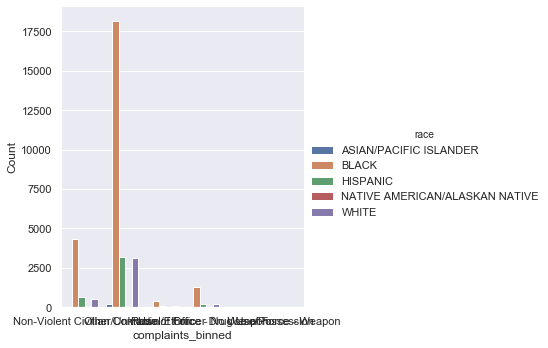

In [37]:
ax = sns.catplot(x="complaints_binned", y = "Count" , data=complaint_bins_by_race, hue ="race", kind = "bar")

SyntaxError: unexpected EOF while parsing (<ipython-input-25-5d6f301257df>, line 6)

(13461, 1)

## Exploratory on CPD filed complaints

## TRR actions on CPD filed complaints